SVD decomposes a matrix $M$ into three other matrices with special properties, making them easier to manipulate. SVD:

$$M = USV^{T}$$

Where:

- $U$ is a matrix whose columns are the eigenvectors of the $M \times M$ transposed matrix. (AKA left eigenvectors)
- $S$ is a diagonal matrix whose diagonal elements are the singular values of $M$.
- $V$ is a matrix whose columns are the eigenvectors of the $M$ transposed $\times M$ matrix. (AKA right eigenvectors)

In [ ]:
!pip install jupyterthemes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd as scipy_svd
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# we can confirm this with code
A = np.array([[1, 0.3], [0.45, 1.2]])
U, S, V = scipy_svd(A)
print('singular values:', S)

# the toy 2d matrix
x = np.array([[-10, -10, 20, 20], [-10, 20, 20, -10]]).T
x

singular values: [1.49065822 0.71444949]


array([[-10, -10],
       [-10,  20],
       [ 20,  20],
       [ 20, -10]])

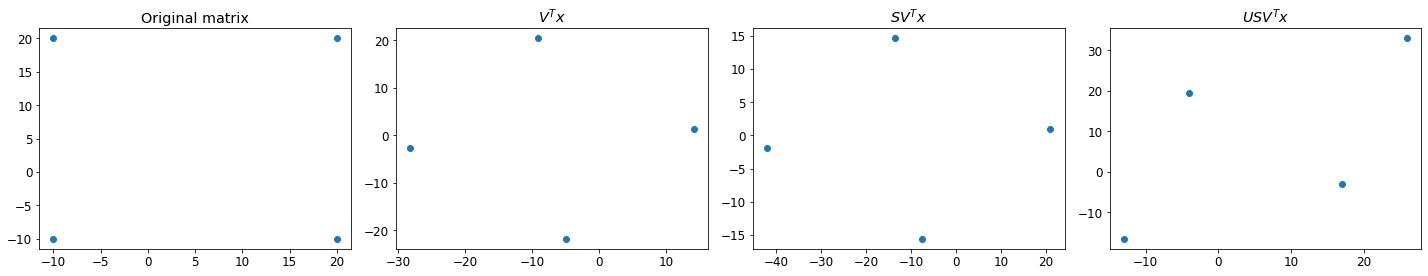

In [4]:
# change default font size
plt.rcParams['font.size'] = 12 

# the plot is not as pretty as the diagram above,
# but hopefully it gets the point across
fig, ax = plt.subplots(1, 4, figsize = (20, 4))

ax[0].scatter(x[:, 0], x[:, 1])
ax[0].set_title('Original matrix')

temp = x @ V.T
ax[1].scatter(temp[:, 0], temp[:, 1])
ax[1].set_title('$V^Tx$')

temp = temp @ np.diag(S)
ax[2].scatter(temp[:, 0], temp[:, 1])
ax[2].set_title('$SV^Tx$')

temp = temp @ U
ax[3].scatter(temp[:, 0], temp[:, 1])
ax[3].set_title('$USV^Tx$')

plt.tight_layout()
plt.show()

In [5]:
# matrix form of the table above
rank = 3
A = np.array([
    [1, 1, 1, 0, 0],
    [3, 3, 3, 0, 0],
    [4, 4, 4, 0, 0],
    [5, 5, 5, 0, 0],
    [0, 2, 0, 4, 4],
    [0, 0, 0, 5, 5],
    [0, 1, 0, 2, 2]])

# we'll use a library to perform the svd
# so we can confirm our result with it
U, S, V = scipy_svd(A, full_matrices = False)

# we'll just print out S, a.k.a Sigma to show the numbers
# are identical to the results shown earlier
print(S)

[1.24810147e+01 9.50861406e+00 1.34555971e+00 3.04642685e-16
 0.00000000e+00]


In [6]:
# the following cell verifies some properties of SVD

# Verify calculation of A=USV^T
print(np.allclose(A, U @ np.diag(S) @ V))

# orthonormal, columns are unit vectors (length = 1)
print(np.allclose(np.round(np.sum(U * U, axis = 0)), np.ones(S.size)))

# orthogonal, dot product of itself is equivalent to
# the identity matrix U^T U = I
print(np.allclose(U.T @ U, np.eye(S.size)))

True
True
True


In [7]:
AtA = A.T @ A
_, V1 = np.linalg.eig(AtA)

# Note that the possible non-uniqueness of the decomposition means
# that an axis can be flipped without changing anything fundamental,
# thus we compare whether the absolute values are relatively close
# instead of the raw value
print(np.allclose(np.abs(V1[:, :rank]), np.abs(V1[:, :rank])))

True


In [8]:
AAt = A @ A.T
_, U1 = np.linalg.eig(AAt)
np.allclose(np.abs(U1[:, :rank]), np.abs(U[:, :rank]))

True

In [9]:
# notice that since this is a rank 3 matrix
# only the first 3 values of 3 contains non-zero values
np.round(S, 0)

array([12., 10.,  1.,  0.,  0.])

In [ ]:
#http://ethen8181.github.io/machine-learning/dim_reduct/svd.html#Singular-Value-Decomposition-(SVD)

In [ ]:
import numpy as np


In [2]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
v = np.array([[2], [1]])
print(v)

[[2]
 [1]]


In [4]:
print(v.flatten())

[2 1]


(-1.0, 4.0)

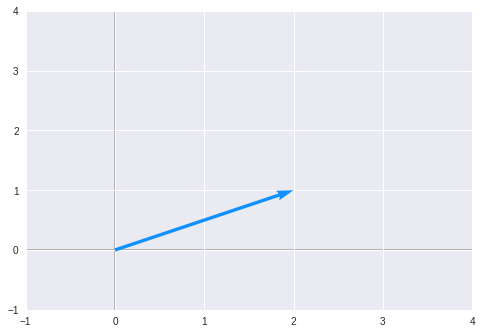

In [7]:
plotVectors([v.flatten()], cols=['#1190FF'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

[[1]
 [2]]


(-1.0, 4.0)

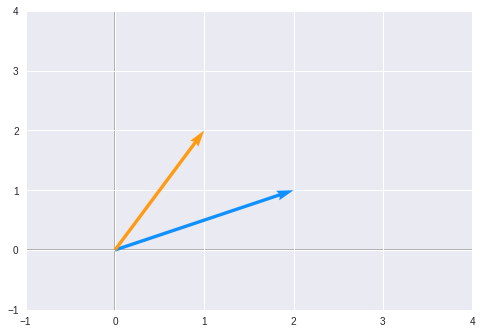

In [9]:
A = np.array([[-1, 3], [2, -2]])
Av = A.dot(v)
print(Av)
plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)